___
# Atividade: Modelos probabilísticos contínuos e Dados

___
## Aula 16

<div id="indice"></div>

## Índice

- [Teoria: Distribuição Exponencial](#teoria)
    - [Esperança e Variância](#esperanca-variancia)
- [Base de Dados: Problema](#dados)
    - [Modelo teórico](#modelo-teorico)
        - [Exercício 1](#ex1)
        - [Exercício 2](#ex2)
        - [Exercício 3](#ex3)
        - [Exercício 4](#ex4)
        - [Exercício 5](#ex5)
        
    - [Resultados empíricos](#resultados-empiricos)
        - [Exercício 6](#ex6)
        - [Exercício 7](#ex7)
        - [Exercício 8](#ex8)
    - [Comparação: resultados empíricos *vs* modelo teórico](#comparacao)
        - [Exercício 9](#ex9)
        - [Exercício 10](#ex10)
    - [Exercício extra](#ex-extra)

- [Lista de comandos utilizados neste notebook](#comandos)

In [128]:
import numpy as np
import math
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

___

<div id="teoria"></div>

## Teoria: Distribuição Exponencial em Python

A biblioteca SciPy está cheia de funções para nos ajudar a trabalhar com variáveis aleatórias! https://en.wikipedia.org/wiki/SciPy

Algumas funções úteis para desenvolver seu código considerando a distribuição Exponencial: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

Lembrando que vamos assumir que se $X\sim Exp(\lambda)$ então $E(X)=\mu=1/\lambda$

Logo, faça `from scipy import stats` e `mu=1/lambda`, então:

* $f(x)$: `stats.expon.pdf(x, scale=mu)`

* $P(X\leq x)$: `stats.expon.cdf(x, scale=mu)`

* $x$ tal que $q=P(X\leq x)$: `stats.expon.ppf(q, scale=mu)`

* $E(X)$: `stats.expon.mean(scale=mu)`

* $Var(X)$: `stats.expon.var(scale=mu)`

* $DP(X)$: `stats.expon.std(scale=mu)`

___

<div id="problema"></div>

## Problema:

A durabilidade (em anos) de transistores de potência usados em regulação de redes elétricas é modelada como uma exponencial com **média $1.5$ anos**.

Nesse caso, vamos assumir que a variável aleatória contínua nesse problema é dada por:

  * $X$: durabilidade de transistores de potência usados em regulação de redes elétricas, em anos

Pelo modelo teórico exponencial onde a $E(X)=\mu=\frac{1}{lambda}$ e considerando que a duraçao média é de $1.5$ anos, podemos assumir que $\mu=1.5$ e que $\lambda=1/1.5$, ou seja,

  * $X\sim Exponencial(1/1.5)$

___
<div id="modelo-teorico"></div>

## Modelo teórico

### Plotando os gráficos

Técnicas de visualização podem nos ajudar a desenvolver intuições sobre o problema com o qual estamos trabalhando. Nas células abaixo vamos gerar o gráfico da função densidade de probabilidade da exponencial de acordo com o parâmetro do problema.

In [129]:
# Parâmetro da distribuição (mu = 1/lambda)
mu = 1.5

A função é definida em um domínio contínuo (no caso a durabilidade em anos é uma variável contínua), não temos como gerar todos os valores possíveis de $x$ para calcular $f(x)$ e plotar o gráfico. Por isso calculamos o valor de $f(x)$ para diversos valores de $x$ que estejam próximos o suficiente uns dos outros.

In [130]:
# Gerando 1000 valores para o eixo x de 0 a 10
x = np.linspace(0, 10, 1000)
# Descomente a linha a seguir se quiser saber o que está guardado na variável x
# x

O argumento `x` da função `stats.expon.pdf` não precisa ser um único número. Se passamos uma sequência de números ela devolve o valor da função densidade de probabilidade calculada em cada um desses números:

In [131]:
# Calcula fx para cada x
fx = stats.expon.pdf(x, scale=mu)
# Descomente a linha a seguir se quiser saber o que está guardado na variável fx
# fx

Agora sim podemos plotar o gráfico da função densidade de probabilidade:

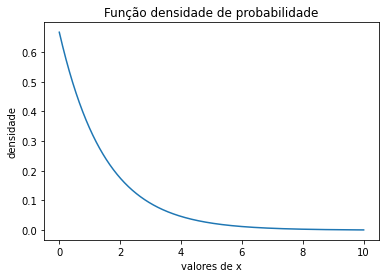

In [132]:
# Plot da função densidade de uma exponencial com média = 8
plt.plot(x, fx)
plt.ylabel('densidade')
plt.xlabel('valores de x')
plt.title('Função densidade de probabilidade')
plt.show()

<div id="ex1"></div>

### EXERCÍCIO 1

Como vimos, o parâmetro da exponencial é $E(X)=\frac{1}{\lambda}$.

Baseado no exemplo da função densidade de probabilidade mostrado acima, plote a função cumulativa considerando o parâmetro do problema.

**Dica:** Entenda a função `stats.expon.cdf`, que se encontra no pacote `scipy`. O argumento `x` não necessariamente precisa ser apenas um número.



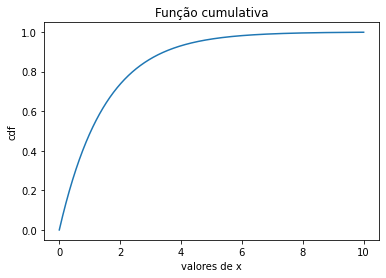

In [133]:
fx_cdf = stats.expon.cdf(x, scale=mu)

plt.plot(x, fx_cdf)
plt.ylabel('cdf')
plt.xlabel('valores de x')
plt.title('Função cumulativa')
plt.show()


<div id="ex2"></div>

### EXERCÍCIO 2

Dado que um transistor já durou 2 anos, qual a probabilidade que dure **até** mais 1 ano?

*Resposta esperada: 0.4865828809674078*

In [134]:
# P(x <= 3 | P > 2)

p = (stats.expon.cdf(3, scale=mu) - (stats.expon.cdf(2, scale=mu)))  / (1 - stats.expon.cdf(2, scale=mu))
print(f'A probabilidade é de {p}')

A probabilidade é de 0.4865828809674078


A seguir apresentamos duas possíveis soluções.

### Solução 1: Calculando usando a fórmula da função de distribuição acumulada da Exponencial

Lembramos que $P(X\leq3|X>2) = \frac{P(X\leq3 \cap X>2)}{P(X>2)}$

Sabemos que a interseção entre $X\leq3$  e $X>2$  é a faixa  $2<X\leq3$

Portanto a fórmula fica:

$P(X\leq3|X>2) = \frac{P(2< X \leq3)}{P(X>2)}$

#### Calculando usando a fórmula da cumulativa da exponencial:

Inicialmente, vamos calcular o **denominador** da fórmula:

$P(X>2) = 1 - P(X\leq2)$

Sabemos da fórmula da cumulativa para a exponencial que $P(X\leq x) = 1 - e^{-\lambda x}$, em que $\lambda = 1/\mu$.


Juntando tudo temos, para o denominador :
$P(X > x) = 1 - (1 - e^{-\lambda x}) = e^{-\lambda x}$

In [135]:
mu = 1.5
lambd = 1/mu
x = 2

P_X_maior_2 = math.e**(-lambd*x)
print(f'P(X > 2) = {P_X_maior_2}')

P(X > 2) = 0.2635971381157268


Vamos nos voltar agora para **numerador** da relação, ou seja,  $P(2< X \leq 3)$. 

Sabemos que a probabilidade acumulada entre 2 e 3 é a diferença das acumuladas (lembrando que no caso de $X$ ser variável aleatória contínua a $P(X=x)=0$ **sempre**. Assim:

$P(2<X\leq3) = P(X\leq3) - P(X\leq2) = (1 - e^{-\lambda3}) - (1 - e^{-\lambda2})$

Simplificando a expressão temos:

$P(2<X\leq3) = e^{-\lambda2} - e^{-\lambda3}$

Vamos calcular:

In [136]:
P_entre_2e3 = math.e**(-lambd*2) - math.e**(-lambd*3)
f'P(2 < X <= 3) = {P_entre_2e3}'

'P(2 < X <= 3) = 0.12826185487911412'

In [137]:
resp = P_entre_2e3/P_X_maior_2
f'A probabilidade de que um transistor durar apenas até mais um ano, dado que durou já 2 anos, é de {resp*100:.4f}%'

'A probabilidade de que um transistor durar apenas até mais um ano, dado que durou já 2 anos, é de 48.6583%'

### Solução 2: Calculando usando de forma inteligente a função CDF via `scipy.stats`

Podemos realizar o mesmo cálculo sem a fórmula da exponencial, usando o módulo `stats.expon`. Vejamos:

Via `scipy`, temos que  $P(X\leq x)=$ `stats.expon.cdf(scale=mu)` e que $P(X>x)=1-$`stats.expon.cdf(scale=mu)`

Lembremos que estávamos calculando $P(X\leq3|X>2) = \frac{P(2< X \leq3)}{P(X>2)}$, ou seja: `P_entre_2e3/P_X_maior_2`. É o que vamos fazer agora:

In [138]:
P_entre_2e3_v2 = stats.expon.cdf(3, scale=mu) - stats.expon.cdf(2, scale=mu)
f'P(2 < X <= 3) = {P_entre_2e3_v2}'

'P(2 < X <= 3) = 0.128261854879114'

In [139]:
P_X_maior_2_v2 = 1 - stats.expon.cdf(2, scale=mu)
f'P(X > 2) = {P_X_maior_2_v2}'

'P(X > 2) = 0.2635971381157267'

In [140]:
resp_v2 = P_entre_2e3_v2/P_X_maior_2_v2
f'A probabilidade de que um transistor durar apenas até mais um ano, dado que durou já 2 anos, é de {resp_v2*100:.4f}'

'A probabilidade de que um transistor durar apenas até mais um ano, dado que durou já 2 anos, é de 48.6583'

**Note que é  mais prático fazer dessa última forma!**

<div id="ex3"></div>

### EXERCÍCIO 3

A partir do modelo teórico, encontre a durabilidade mediana.

Consulte uso do comando `stats.expon.ppf()`.

*Resposta esperada: 1.0397207708399179*

In [141]:
print(stats.expon.ppf(0.5, scale=mu))

1.0397207708399179


<div id="ex4"></div>

### EXERCÍCIO 4

A partir do modelo teórico, encontre a durabilidade mínima dos 20% de transistores que possuem os maiores tempos de duração.

*Resposta esperada: 2.4141568686511508*

In [142]:
print(stats.expon.ppf(0.8, scale=mu))

2.4141568686511508


<div id="ex5"></div>

### EXERCÍCIO 5

Assuma que os clientes compram esses transistores em caixas com 12 unidades. 

Nesse caso, calcule a probabilidade de que exatamente metade da caixa dure mais de 2 anos. Lembre de definir a variável aleatória de interesse e respectiva distribuição, com a qual calculará a probabilidade.

*Resposta esperada: 0.04943208418207984*

In [143]:
# variável aleatória: durabilidade
# distribuição utilizada: binomial

x = 6                                    # metade da caixa
n = 12                                   # total de transistores na caixa
p = 1 - stats.expon.cdf(2, scale=mu)     # probabilidade de um transistor durar mais de dois anos

print(stats.binom.pmf(x, n, p))

0.04943208418207989


<div id="resultados-empiricos"></div>

## Resultados empíricos

Os dados de durabilidade de transistores de potência usados em regulação de redes elétricas foram registrados no arquivo `transistores.csv`.

In [144]:
# Carregando os dados
dados_transistores = pd.read_csv('transistores.csv')
valores_f = dados_transistores['durabilidade']

<div id="ex6"></div>

### EXERCÍCIO 6

Considerando medidas-resumo, faça uma análise descritiva desses valores.

In [145]:
valores_f.describe().to_frame()

,durabilidade
count,100.000000
mean,1.504835
std,1.505427
min,0.005400
25%,0.537100
50%,1.088700
75%,1.841150
max,8.597200


<div id="ex7"></div>

### EXERCÍCIO 7

Construa uma tabela de frequências para os valores de durabilidade observados e armazenados no conjunto de dados.

Como a durabilidade do transistor é uma variável considerada contínua, aplicar o comando `.value_counts(True)` diretamente nos dados, não surtirá bons resultados com o intuito de resumir e descrever o comportamento dessa variável.

Faça o teste você mesmo:

In [146]:
freq_r = valores_f.value_counts(normalize=True).sort_index()
freq_r.to_frame()

,durabilidade
0.0054,0.01
0.0107,0.01
0.0357,0.01
0.0397,0.01
0.0424,0.01
...,...
4.1361,0.01
5.2440,0.01
5.5433,0.01
8.3913,0.01


Nesse caso, será necessário utilizar o comando `pd.cut()` para criar faixas de valores. Veja [aqui](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html) o uso desse comando.

Considere as faixas de valores guardadas na variável `faixa` e aplique o comando `pd.cut()` nos dados observados.

Ainda, interprete os resultados.

In [147]:
faixa = np.arange(0,11,1)
faixa

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [148]:
freq_r = pd.cut(valores_f, faixa).value_counts(normalize=True).sort_index()
freq_r.to_frame()

,durabilidade
"(0, 1]",0.45
"(1, 2]",0.33
"(2, 3]",0.12
"(3, 4]",0.05
"(4, 5]",0.01
"(5, 6]",0.02
"(6, 7]",0.00
"(7, 8]",0.00
"(8, 9]",0.02
"(9, 10]",0.00


<div id="ex8"></div>

### EXERCÍCIO 8

Para visualizar graficamente valores de uma variável quantitativa quebrada em faixas de valores, podemos utilizar um histograma. O uso desse gráfico facilita a interpretação de como os valores observados se distribuem nas faixas de valores e também permite compreender, ainda que descritivamente, se um determinado modelo teórico faz ou não um bom ajuste aos dados.

Para estudar a construção de um histograma no Python, veja [aqui](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html).

Agora, faça o histograma dos valores armazenados em `valores_f` considerando o argumento `bins=faixa` e use o argumento `density=True` para que a área do gráfico seja igual a 1.


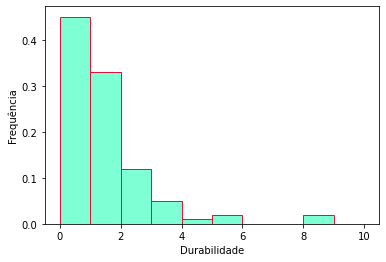

In [149]:
plt.hist(valores_f, bins=faixa, color='aquamarine', edgecolor='crimson', density=True)
plt.xlabel('Durabilidade')
plt.ylabel('Frequência')
plt.show()


**Interpretação: O contorno do histograma de densidade de frequências relativas parece sugerir um contorno exponencial, ou seja, menores valores com maiores concentrações (densidades) e redução gradativa dessas densidades conforme os valores aumentam. Assim, faria sentido que os dados seguissem uma distribuição exponencial**.

<div id="comparacao"></div>

## Comparação: resultados empíricos *vs* modelo teórico

<div id="ex9"></div>

### EXERCÍCIO 9

Considerando os valores observados na amostra, **estime** o valor de $\mu$ e, por consequência, **estime** o valor de $\lambda$ da distribuição exponencial.

*Resposta esperada: mu = 1.5048349999999997 lambda = 0.6645246821080053*

In [150]:
print(f'O mu estimado é {valores_f.mean()}.')
print(f'O lambda estimado, por consequência, é {1 / valores_f.mean()}')


O mu estimado é 1.5048349999999997.
O lambda estimado, por consequência, é 0.6645246821080053


<div id="ex10"></div>

### EXERCÍCIO 10

Utilize essa estimativa obtida no exercício anterior e faça os dois seguintes gráficos:

  * Visualize a função densidade de probabbilidade (f.d.p.) da exponencial assumindo agora a estimativa de $\mu$ no argumento `scale`. **Dica**: A f.d.p. já foi construida no começo desta atividade.
  * Visualize a f.d.p. anterior sobre o histograma de densidade obtido a partir dos dados.



Podemos visualizar a função de densidade de probabilidade **sobre** o histograma de densidade.

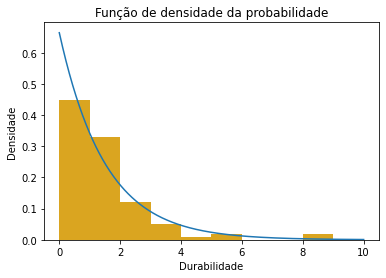

In [159]:
x_teste = np.linspace(0, 10, 1000)
fx_teste = stats.expon.pdf(x_teste, scale=valores_f.mean())

plt.hist(valores_f, bins=faixa, color='goldenrod', density=True)
plt.plot(x_teste, fx_teste)
plt.title('Função de densidade da probabilidade')
plt.xlabel('Durabilidade')
plt.ylabel('Densidade')
plt.show()

Essa figura permite ver que a função exponencial ajusta aproximadamente a densidade com que os dados estão distribuídos no histograma

<div id="ex-extra"></div>

## EXERCÍCIO EXTRA

<div id="ex11"></div>

### EXERCÍCIO 11


Descubra como usar a função `probplot()` [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) para poder avaliar se faz sentido que os dados tenham vindo de uma exponencial. 

Após construção desse gráfico, responda se faz sentido.


In [152]:
# COLOQUE SEU CÓDIGO AQUI

**Resposta: O probplot traça o que seria o esperado do ponto de vista teórico na distribuição analisada versus os dados reais encontrados. Quanto mais próximos da diagonal, mais prováveis é que os dados sigam a distribuição.**

**No problema em questão pode-se dizer que os dados parecem seguir uma exponencial, apesar do ajuste não ser perfeito.**

A imperfeição do ajuste pode ser explicada porque temos apenas 100 dados. Um número maior de amostras permitira concluir com maior certeza se os dados seguem uma exponencial ou não. Ainda, um teste inferencial permitiria concluir com algum coeficiente de confiança (assunto após Avaliação Intermediária).




<div id="comandos"></div>

___

## Lista de comandos utilizados neste notebook

Os seguintes comandos foram utilizados neste jupyter notebook. Para facilitar sua consulta, escreva um resumo do que cada um deles faz:

- [`.ppf()`](#ppf): ESCREVA AQUI O RESUMO
- [`pd.cut()`](#cut): ESCREVA AQUI O RESUMO
- [`plt.hist()`](#hist): ESCREVA AQUI O RESUMO
- [`.probplot()`](#probplot): ESCREVA AQUI O RESUMO